In [ ]:
#Various attempts at pie charts for topic distributions in paper

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install adjustText
from adjustText import adjust_text

In [4]:
df0 = pd.read_csv(f'/home//Files/Topic_Files/topic_0.csv')
df1 = pd.read_csv(f'/home//Files/Topic_Files/topic_1.csv')
df2 = pd.read_csv(f'/home//Files/Topic_Files/topic_2.csv')
df3 = pd.read_csv(f'/home//Files/Topic_Files/topic_3.csv')
df4 = pd.read_csv(f'/home//Files/Topic_Files/topic_4.csv')
df5 = pd.read_csv(f'/home//Files/Topic_Files/topic_5.csv')
df6 = pd.read_csv(f'/home//Files/Topic_Files/topic_6.csv')
df7 = pd.read_csv(f'/home//Files/Topic_Files/topic_7.csv')
df8 = pd.read_csv(f'/home//Files/Topic_Files/topic_8.csv')
df9 = pd.read_csv(f'/home//Files/Topic_Files/topic_9.csv')
df9.head()

In [19]:
sizes = np.array([len(df0), len(df1), len(df2), len(df3), len(df4), len(df5), len(df6), len(df7), len(df8), len(df9)])
labels = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
colors = plt.cm.Paired(range(len(labels)))

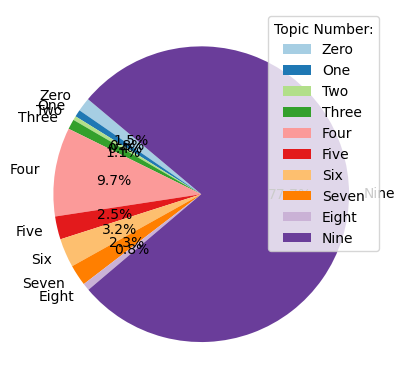

In [20]:
plt.pie(sizes, labels = labels, startangle = 140, colors = colors, autopct='%1.1f%%')
plt.legend(title= "Topic Number:", loc="upper right")
plt.show()

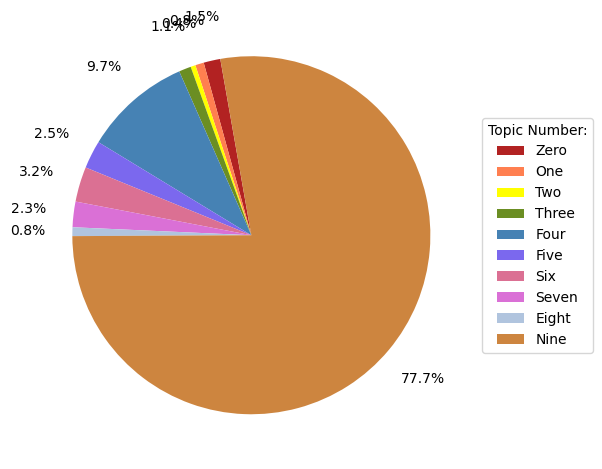

In [48]:
colors = ["firebrick", "coral", "yellow", "olivedrab", "steelblue", "mediumslateblue", "palevioletred", "orchid", "lightsteelblue", "peru"]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots()
ax.pie(sizes, startangle=100, autopct=lambda pct: func(pct, sizes), 
       colors=colors, pctdistance=1.25)

# Move the legend outside of the plot area
ax.legend(title="Topic Number:", labels=labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

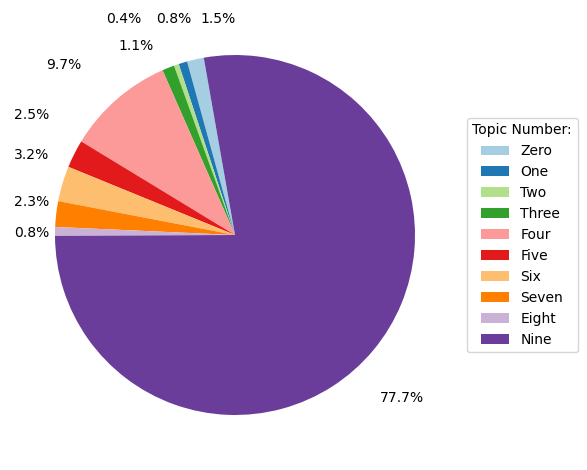

In [44]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, startangle=100, autopct=lambda pct: func(pct, sizes), 
    colors=colors, pctdistance=1.33, labeldistance=1.6
)

# Move the legend outside of the plot area
ax.legend(title="Topic Number:", labels=labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust the text labels to reduce overlap
for text in texts + autotexts:
    text.set_fontsize(10)
    
adjust_text(autotexts, only_move={'points':'y'})

plt.tight_layout()
plt.show()

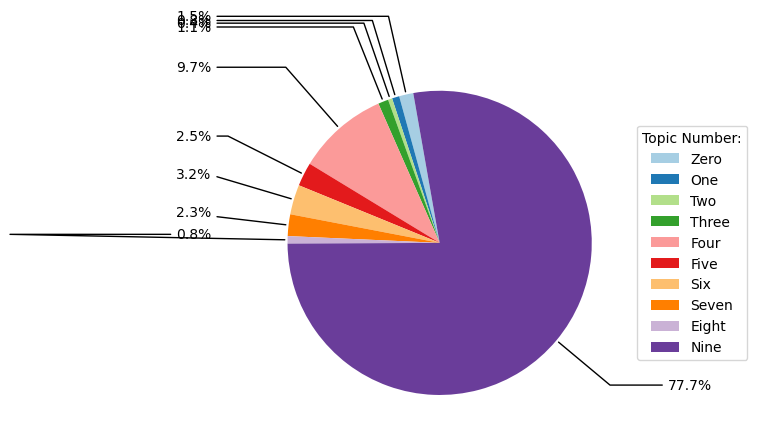

In [45]:
def func(pct, allvals):
    absolute = int(np.round(pct / 100. * np.sum(allvals)))
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, startangle=100, autopct=lambda pct: func(pct, sizes),
    colors=colors, pctdistance=1.33, labeldistance=1.6
)

# Move the legend outside of the plot area
ax.legend(title="Topic Number:", labels=labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust the text labels to reduce overlap
for text in texts + autotexts:
    text.set_fontsize(10)

# Add lines to connect percentages to their slices
for i, autotext in enumerate(autotexts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2. + wedges[i].theta1
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    ax.annotate(
        autotext.get_text(), xy=(x, y), xytext=(1.5 * np.sign(x), 1.5 * y),
        horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle),
        fontsize=10
    )
    autotext.set_text('')  # Remove the original text

plt.tight_layout()
plt.show()